## Punto 3

Escriba la velocidad de la luz $c = 3 \times 108 \text{ m/s}$ en unidades de $\text{au/año}$.

$$ c = 3\times10^{8}\cdot\left(\frac{3.154\times10^{7}}{1}\right)\cdot\left(\frac{1}{1.496\cdot10^{11}}\right)au/año= 63248.66\ au/año$$

## Punto 4

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [2]:
class Planeta: # minisculas: vectores en el tiempo, mayusculas: vectores instantaneos
    
    def __init__(self, e, a, t): # Excentricidad y semi eje mayor
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3) # x,y,z
        self.v = np.zeros_like(self.
                               r)
        self.a = np.zeros_like(self.r)
        
        # Condiciones iniciales
        self.r[0] = self.a_*(1-self.e) # 1 - excentricidad del perihelio del planeta
        self.v[1] = np.sqrt(self.G*(1+self.e) / (self.a_*(1.-self.e))) # se conserva el momento angular
        
        # Historial
        self.R = np.zeros((len(t), len(self.r)))
        self.V = np.zeros_like(self.R)
        
        self.rp = self.r # Valor del pasado
        
    def GetAceleration(self):
        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r
    
    def Evolution(self, i):
        
        self.SetPosition(i) # para ir guardando
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt # euler
        
        else:
            self.rf = 2*self.r - self.rp + self.a*self.dt**2 # valor futuro -> Integracion de Verlet
            self.v = (self.rf - self.rp)/(2*self.dt) # definicion derivada central
            
            self.rp = self.r # mi pasado ahora es el presente del paso anterior
            self.r = self.rf # mi presente ahora es el futuro del paso anterior
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
        
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        Dist = np.linalg.norm(self.R, axis = 1)
        timeup = []
        pos = 0
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
                pos = i
            
        return timeup

In [3]:
# Semiejes mayores

SE_mercurio = 0.3871
SE_venus = 0.7233 
SE_tierra = 1.
SE_marte = 1.523679
SE_jupiter = 5.204267

SemiEjes = np.array([SE_mercurio, SE_venus, SE_tierra, SE_marte, SE_jupiter])

In [4]:
def GetPlanetas(t):
    
    Mercurio = Planeta(0.2056, SE_mercurio, t)
    Venus = Planeta(0.0067, SE_venus, t)
    Tierra = Planeta(0.01671, SE_tierra, t)
    Marte = Planeta(0.093315, SE_marte, t)
    Jupiter = Planeta(0.0487749764, SE_jupiter, t)
    
    return [Mercurio,Venus,Tierra,Marte,Jupiter]

In [5]:
dt = 0.001
tmax = 1000 # 1 año jupiter maso 12 años tierra
t = np.arange(0., tmax, dt)
Planetas = GetPlanetas(t)

In [6]:
def RunSimulation(t,Planetas):
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            
    return Planetas

In [7]:
Planetas = RunSimulation(t,Planetas)

Running simulation: 100%|██████| 1000000/1000000 [00:34<00:00, 29312.46 Steps/s]


In [8]:
scale = 10
t1 = t[::scale]

In [9]:
# plt.plot(Planetas[0].GetPosition()[:,0],Planetas[0].GetPosition()[:,1]) # visualizar orbitas

<IPython.core.display.Javascript object>


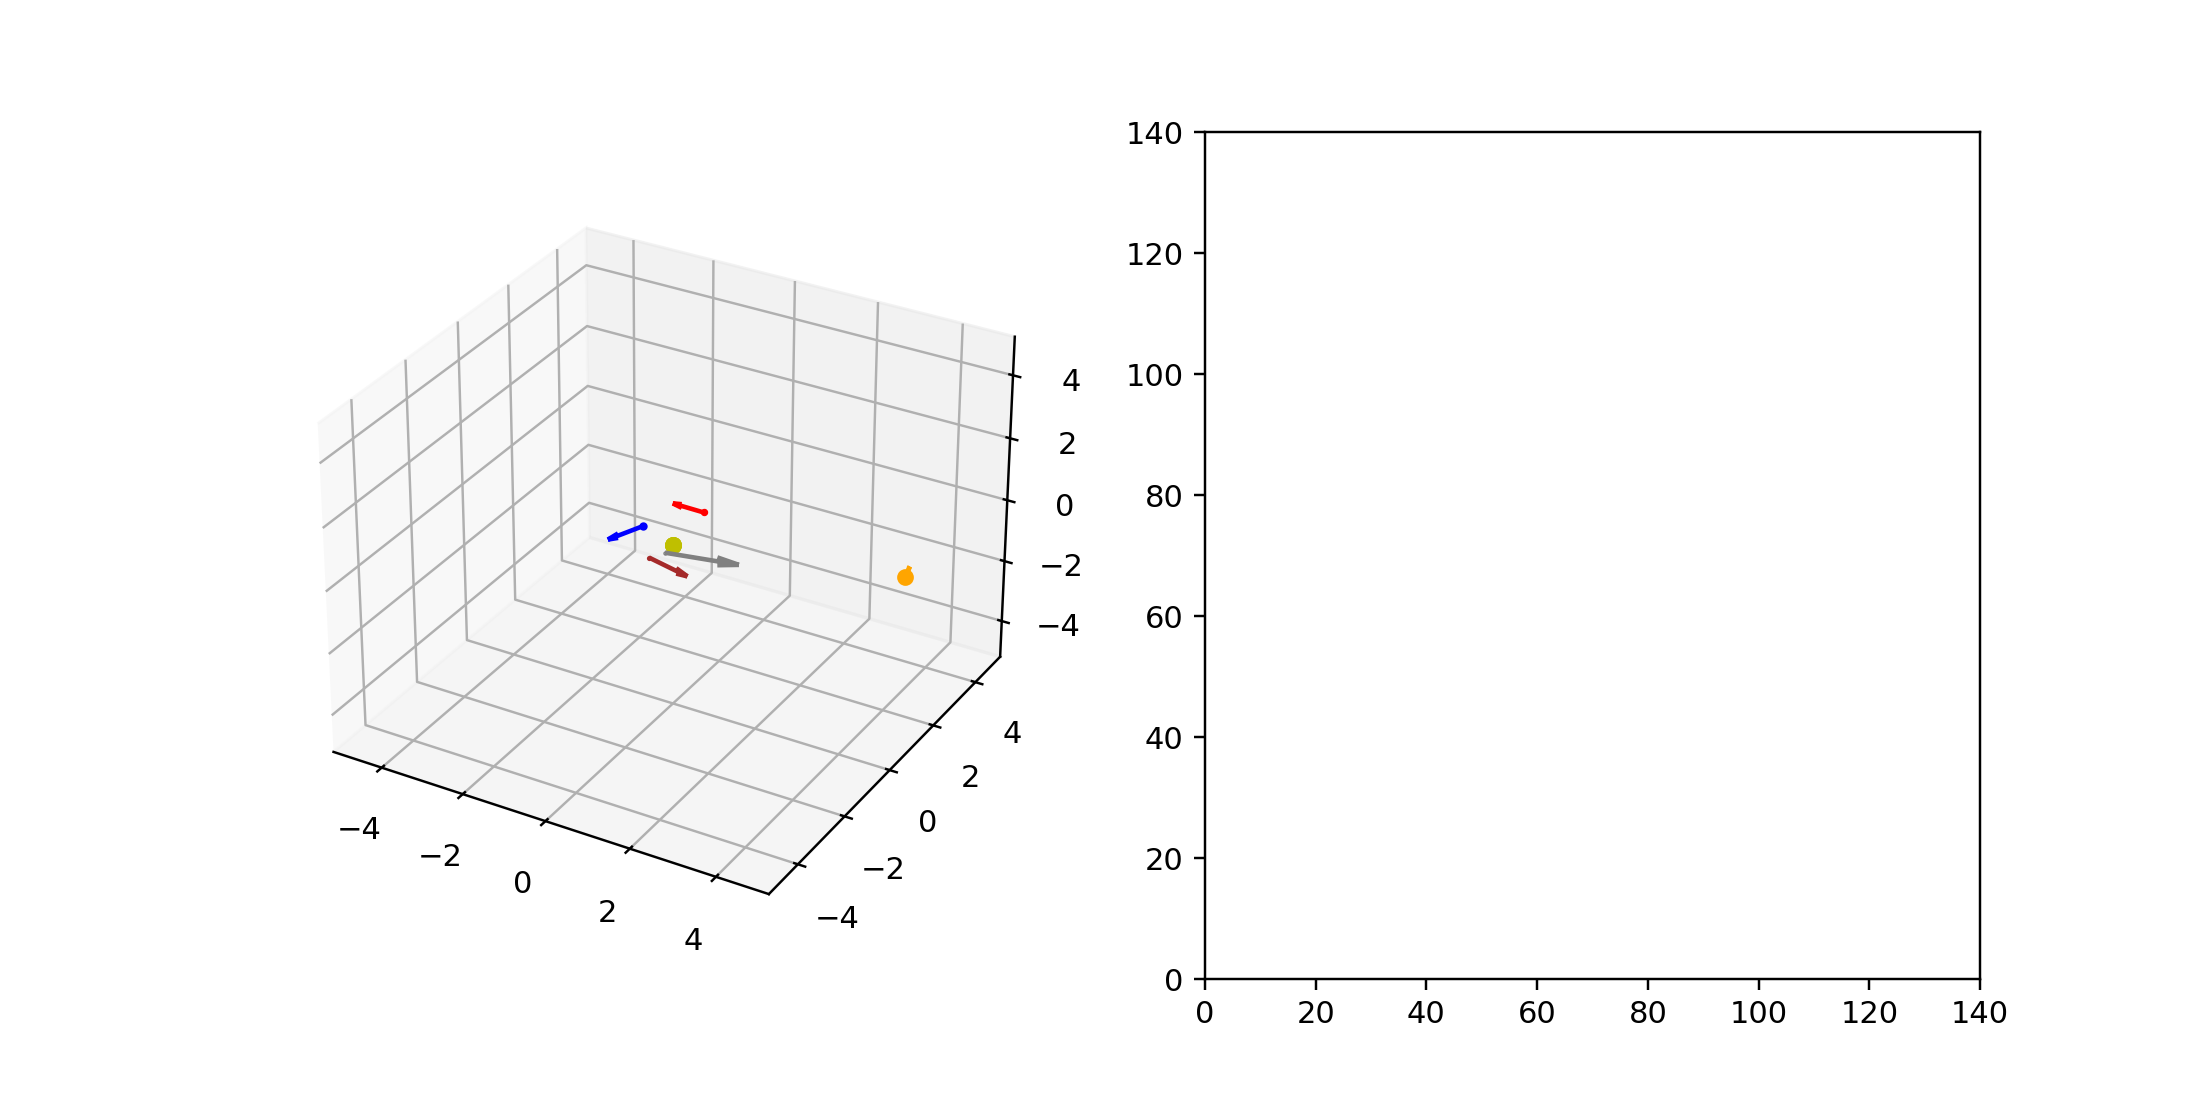

In [15]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121,projection='3d')
ax1 = fig.add_subplot(122)

colors = ['gray','brown','b','r','orange']
size = [0.2, 0.5, 3, 2, 20]

def init():
    
    ax.clear()
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_zlim(-5,5)
    
    ax1.clear()
    ax1.set_xlim(0,140)
    ax1.set_ylim(0,140) 
    
def Update(i):
    
    init()
    
    for j, p in enumerate(Planetas):
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        z = p.GetPosition(scale)[i,2]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        vz = p.GetVelocity(scale)[i,2]
    
        ax.scatter(0, 0, 0, s = 20,color='y')
        ax.quiver(x,y,z,vx,vy,vz, color=colors[j], length=0.15)
        
        ax.scatter(x,y,z, s = size[j],color=colors[j])

Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

## Periodos usando el Perihelio

In [11]:
T_mercurio = Planetas[0].GetPerihelio()[-1] - Planetas[0].GetPerihelio()[-2] # aprox 0.1586
T_venus = Planetas[1].GetPerihelio()[-1] - Planetas[1].GetPerihelio()[-2] # aprox 0.6155
T_tierra = Planetas[2].GetPerihelio()[-1] - Planetas[2].GetPerihelio()[-2]
T_marte = Planetas[3].GetPerihelio()[-1] - Planetas[3].GetPerihelio()[-2] # aprox 1.878
T_jupiter = Planetas[4].GetPerihelio()[-1] - Planetas[4].GetPerihelio()[-2] # aprox 11,86 años

Periodos = np.array([T_mercurio, T_venus, T_tierra, T_marte, T_jupiter])

Periodos

array([ 0.241,  0.615,  1.   ,  1.881, 11.872])

<IPython.core.display.Javascript object>


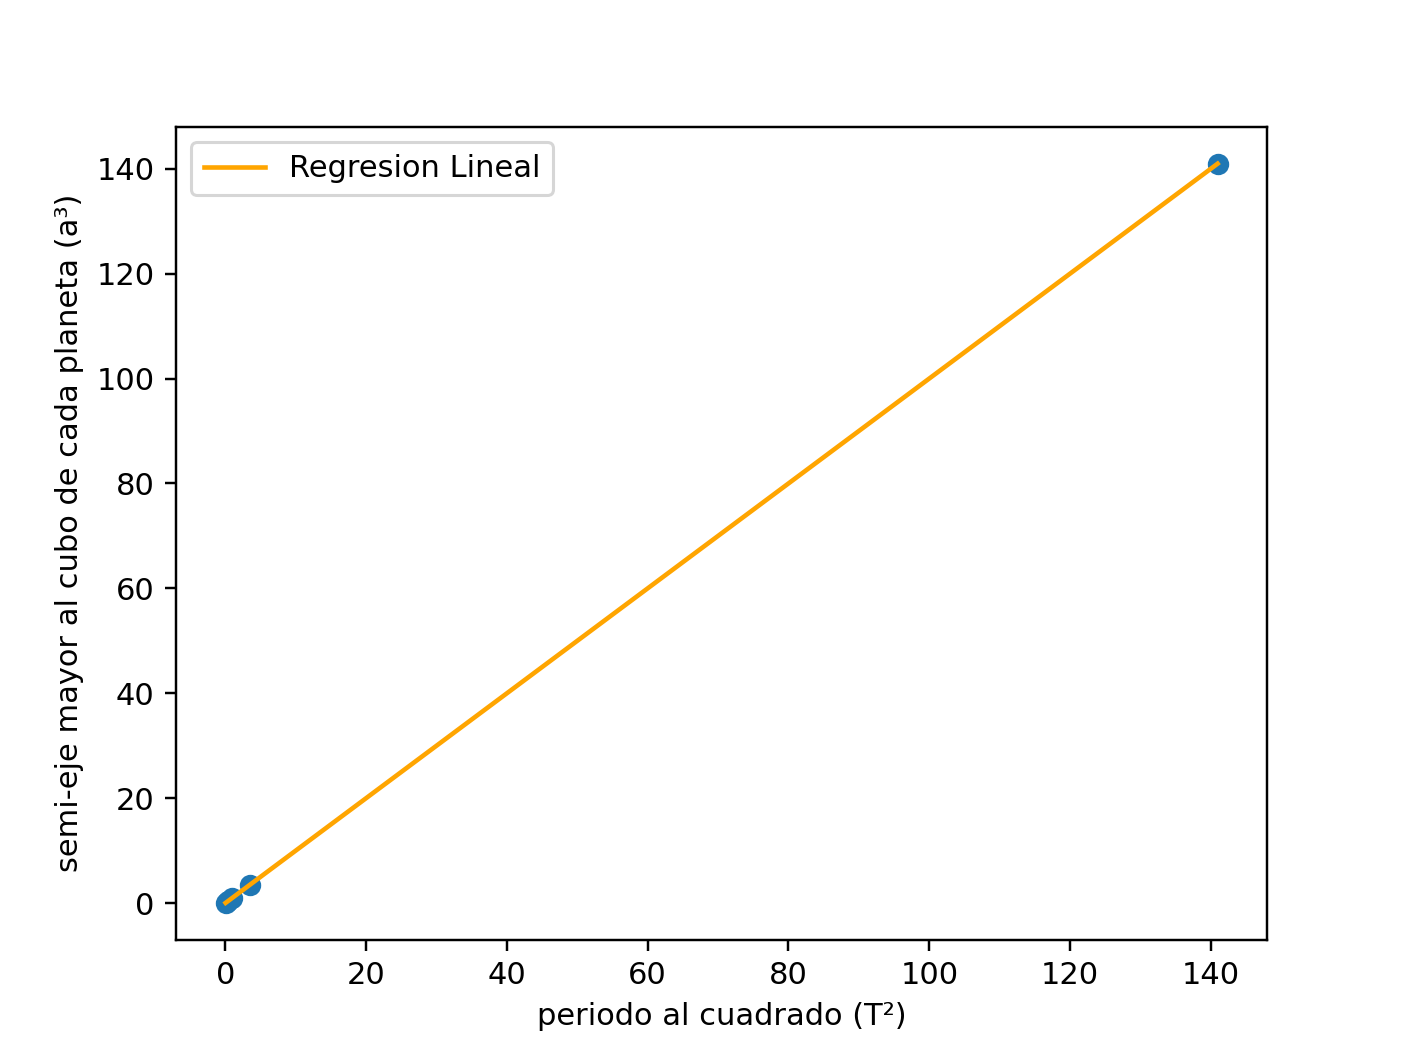

In [14]:
# Funcion auxiliar para la regresion lineal
def GetFit(x,y,n=2):
    
    l = x.shape[0]
    b = y
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)
    xsol = np.linalg.solve(AT,bT)
    
    return xsol

y = SemiEjes**3
x = Periodos**2

n = 1
param = GetFit(x,y,n)
corte, pendiente = param

def GetModel(x,p):
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
    return y

_x = np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,param)
#Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

plt.plot(_x,_y,color='orange', label = 'Regresion Lineal')
plt.scatter(x, y)
plt.xlabel('periodo al cuadrado (T²)')
plt.ylabel('semi-eje mayor al cubo de cada planeta (a³)')
plt.legend()

In [13]:
# Pendiente y corte
pendiente, corte

(1.0000729377571853, -0.0002583848585075184)

Se puede evidenciar un comprotamiento lineal en la gráfica obtenida de periodo al cuadrado contra el semi eje mayor. Esto permite demostrar la tercera ley de Kepler, que dice que, $$\frac{T^2}{a^3}=C$$
que en este caso $C^{-1}=1.0000969441997745$ y se tiene un intercepto despreciable, del orden de $10^{-5}$, debido a la incertidumbre de la simulación.

Asimismo, para encontrar la masa del sol tengamos en cuenta que la constante de la expresión anterior se puede escribir como

$$C = \frac{4\pi^2}{G M_{⊙}}.$$

En unidades astronómicas, tenemos que

$$\frac{4\pi^2}{G}=1.$$

Siguiendo esta expresión en unidades gausianas, la masa del sol sería

$$\text{Masa del Sol en masas solares} = 1.0000969441997745 M_{⊙} $$

Y, haciendo la conversión al sistema internacional

$$\text{Masa del Sol en SI} = C\times(1.989\times10^{30} kg) = 1.98919282\times10^{30} Kg.$$

